In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

#### -> importing dataset

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### -> making X and y labels of data

In [5]:
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

In [6]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

#### -> splitting data into train and test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
#implementing RidgeRegression but it did not prove to be good for our data
#from sklearn.linear_model import Ridge
#model = Ridge()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

#### -> implementing EnsembleRegressors and fitting model

In [10]:
np.random.seed(42)

In [11]:
# baseline model
model = RandomForestRegressor()
model.fit(X_train, y_train);

#### -> evaluating training data

In [12]:
model.score(X_train, y_train)

0.9732082866273128

#### -> evaluating test data

In [13]:
model.score(X_test, y_test)

0.8084770266809368

#### -> making predictions

In [14]:
y_preds = model.predict(X_test)
y_preds

array([0.62098  , 1.35837  , 1.2458001, ..., 4.3175338, 0.56089  ,
       1.8339   ])

#### -> using evaluation metrics for evaluation

In [15]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    r2 = r2_score(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)

    metric_dict = {"r2": round(r2, 2),
                   "mean squared error": round(mse, 2),
                   "mean absolute error": round(mae, 2)}
    print(f"r-squared: {r2 * 100:.2f}%")
    print(f"Mean squared error: {mse * 100:.2f}%")
    print(f"Mean absolute error: {mae*100:.2f}%")
    
    return metric_dict

In [16]:
baseline_metrics = evaluate_preds(y_test, y_preds);

r-squared: 80.85%
Mean squared error: 26.36%
Mean absolute error: 33.20%


#### -> improving the baseline model

In [17]:
# By using Randomized Search Model
np.random.seed(42)

In [18]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [19]:
rs_model = RandomizedSearchCV(estimator = model,
                              param_distributions = grid,
                              n_iter = 10,
                              cv=3,
                              verbose =2)

In [20]:
rs_model.fit(X_train,y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time= 1.4min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimat

C:\Users\mahee\Documents\ML\scikit-learn\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mahee\Documents\ML\scikit-learn\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahee\Documents\ML\scikit-learn\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mahee\Documents\ML\scikit-learn\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

In [21]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [22]:
rs_y_preds = rs_model.predict(X_test)

In [23]:
rs_metrics = evaluate_preds(y_test, rs_y_preds);

r-squared: 82.00%
Mean squared error: 24.78%
Mean absolute error: 33.11%


In [24]:
# By using Grid Search Model
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

In [25]:
grid_2 = {"n_estimators": [500, 1000, 1200],
        "max_depth": [None],
        "max_features": ["sqrt"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [2]}

In [26]:
gs_model = GridSearchCV(estimator = model,
                        param_grid = grid_2,
                        cv = 3,
                        verbose=2)

In [27]:
gs_model.fit(X_train, y_train);

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  38.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  39.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  38.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 1.3min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=

In [28]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [29]:
gs_y_preds = gs_model.predict(X_test)

In [30]:
gs_metrics = evaluate_preds(y_test, gs_y_preds);

r-squared: 81.77%
Mean squared error: 25.09%
Mean absolute error: 33.33%


#### -> comparing and visualizing metrics of all three models

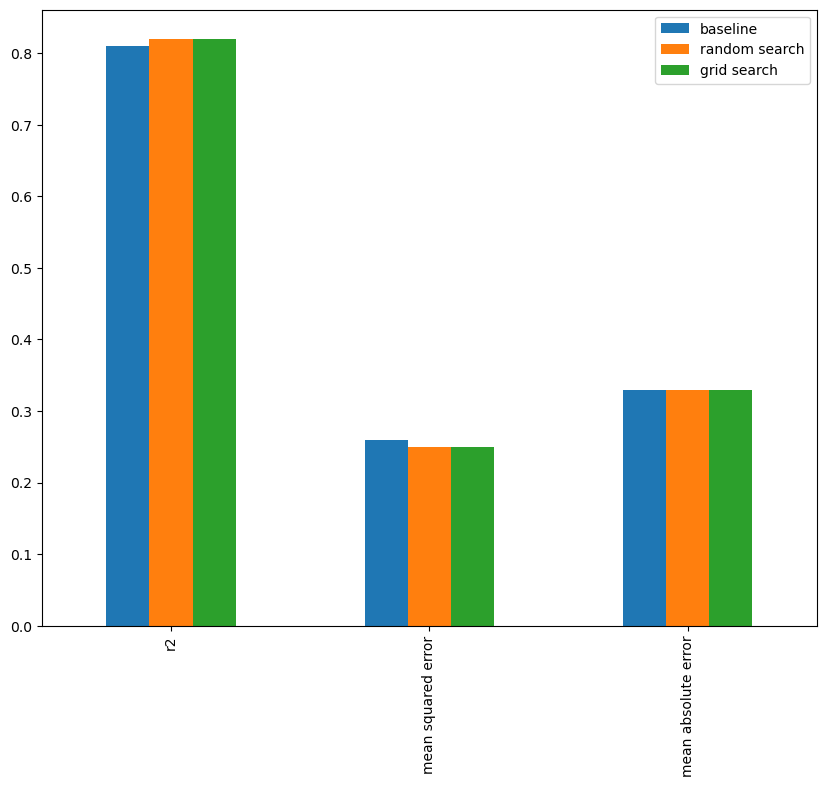

In [31]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));